# Notebook for Supervised and Unsupervised Models of NSL-KDD Dataset

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid')

# custom modules
import sys
sys.path.append('../') # for importing from src
from src.modeling import(
    train_logistic_regression,
    train_isolation_forest,
    evaluate_binary_model,
    evaluate_unsupervised_model
)
from src.utils import plot_confusion, plot_precision_recall

## Load Data

In [2]:
# load preprocessed train/test splits
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (100778, 33)
Test Shape: (25195, 33)


## Check Class Balance

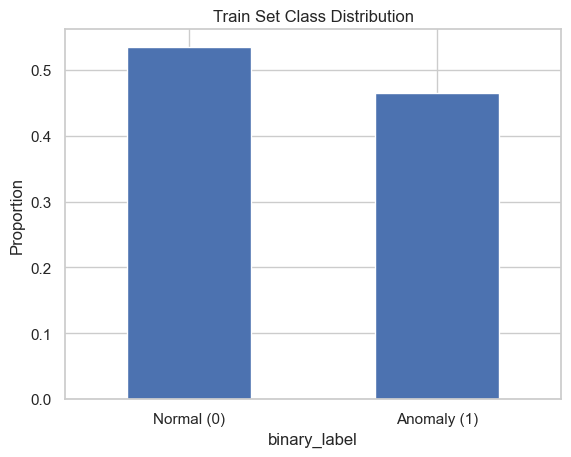

In [3]:
y_train.value_counts(normalize = True).plot(kind = "bar", title = "Train Set Class Distribution")
plt.xticks(ticks = [0, 1], labels = ['Normal (0)', 'Anomaly (1)'], rotation = 0)
plt.ylabel('Proportion')
plt.show()

## Train and Evaluate Logistic Regression

In [4]:
# Train
y_train = np.ravel(y_train)
lr_model = train_logistic_regression(X_train, y_train)

# Evaluate 
lr_metrics = evaluate_binary_model(lr_model, X_test, y_test)
print("Logistic Regression Metrics:")
for k, v in lr_metrics.items():
    print(f"{k}: {v: .3f}")

Logistic Regression Metrics:
accuracy:  0.950
precision:  0.958
recall:  0.935
f1:  0.946
roc_auc:  0.992


## Visualize Logistic Regression

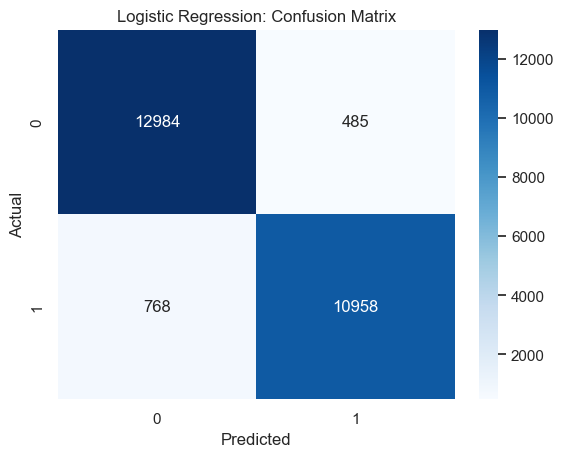

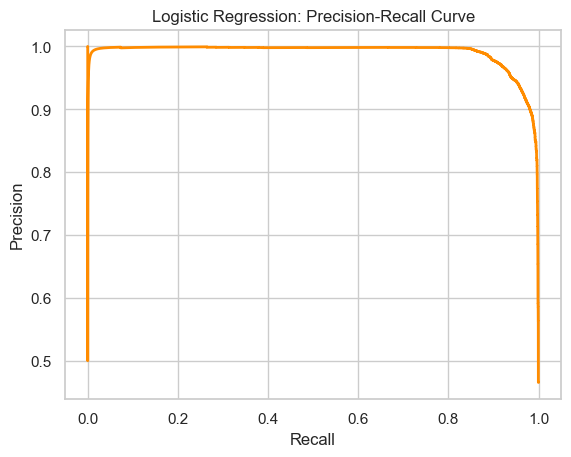

In [5]:
# logistic regression confusion matrix and pr curve
y_pred_lr = lr_model.predict(X_test)
y_score_lr = lr_model.predict_proba(X_test)[:,1]

plot_confusion(y_test, y_pred_lr, title = "Logistic Regression: Confusion Matrix")
plot_precision_recall(y_test, y_score_lr, title = "Logistic Regression: Precision-Recall Curve")

## Train and Evaluate Isolation Forest

In [6]:
# Train unsupervised model
iso_model = train_isolation_forest(X_train, contamination = 0.4)

# Evaluate using true labels (unsupervised trick)
iso_metrics = evaluate_unsupervised_model(iso_model, X_test, y_test)
print("Isolation Forest Metrics:")
for k, v in iso_metrics.items():
    print(f"{k}: {v: .3f}")

Isolation Forest Metrics:
accuracy:  0.586
precision:  0.563
recall:  0.489
f1:  0.524


## Visualize Isolation Forest

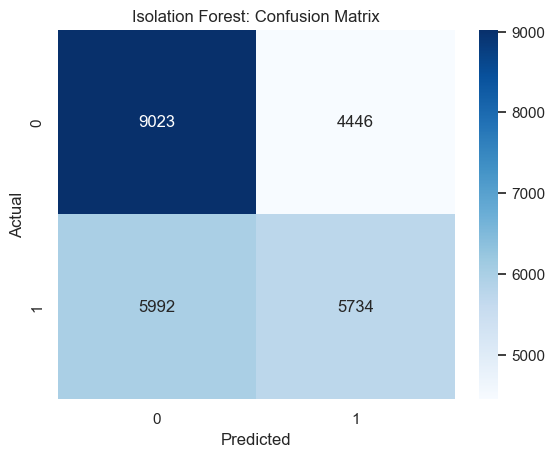

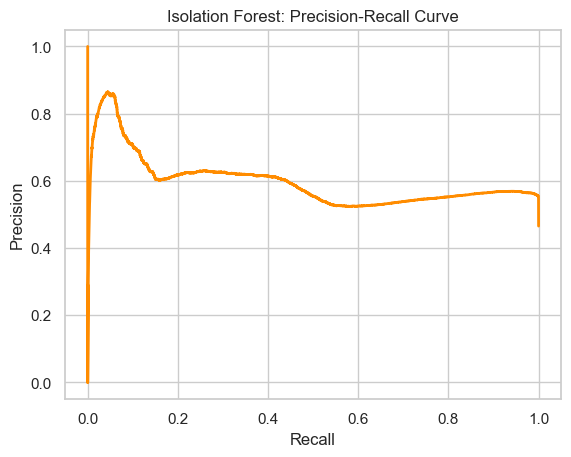

In [7]:
# Isolation forest confusion and pr curve
y_pred_iso = np.where(iso_model.predict(X_test) == -1, 1, 0)
y_score_iso = iso_model.decision_function(X_test) * -1 # higher score = more anomalous

plot_confusion(y_test, y_pred_iso, title = "Isolation Forest: Confusion Matrix")
plot_precision_recall(y_test, y_score_iso, title = "Isolation Forest: Precision-Recall Curve")

## Compare Models

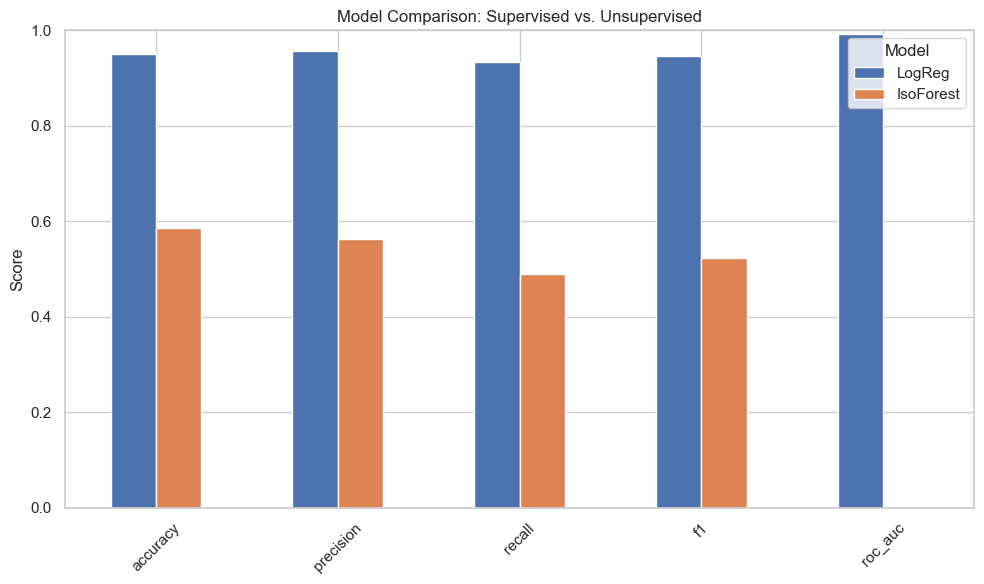

In [8]:
# combine metrics into a dataframe
comparison = pd.DataFrame([lr_metrics, iso_metrics], index = ["LogReg", "IsoForest"])
comparison.T.plot(kind = 'bar', figsize = (10, 6))
plt.title("Model Comparison: Supervised vs. Unsupervised")
plt.ylabel("Score")
plt.xticks(rotation = 45)
plt.ylim(0, 1)
plt.legend(title = 'Model')
plt.tight_layout()
plt.show()

## Save Models

In [9]:
import joblib
joblib.dump(lr_model, "../models/logistic_regression.pkl")
joblib.dump(iso_model, "../models/isolation_forest.pkl")

['../models/isolation_forest.pkl']